In [1]:
import numpy as np
import pandas as pd

In [2]:
import scipy.stats as stats
from scipy.stats import zscore

In [44]:
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

In [13]:
# loading the data into a dataframe

df = pd.read_csv("Heart Disease.csv")
df.head()

,Age,Gender,Chest Pain,Resting BP,Cholesterol,Fasting BS,Resting ECG,Maximum HR,EXA,Old Peak,ST Slope,Heart Disease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
df.shape

(918, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            918 non-null    int64  
 1   Gender         918 non-null    object 
 2   Chest Pain     918 non-null    object 
 3   Resting BP     918 non-null    int64  
 4   Cholesterol    918 non-null    int64  
 5   Fasting BS     918 non-null    int64  
 6   Resting ECG    918 non-null    object 
 7   Maximum HR     918 non-null    int64  
 8   EXA            918 non-null    object 
 9   Old Peak       918 non-null    float64
 10  ST Slope       918 non-null    object 
 11  Heart Disease  918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


---------

### Performing EDA.

In [16]:
# seperating columns of different data types

num = []
cat = []

for i in df.columns:
    if df[i].dtype == "object":
        cat.append(i)
    else:
        num.append(i)

In [17]:
# checking the object variables

for i in cat:
    print(df[i].value_counts())
    print("")

M    725
F    193
Name: Gender, dtype: int64

ASY    496
NAP    203
ATA    173
TA      46
Name: Chest Pain, dtype: int64

Normal    552
LVH       188
ST        178
Name: Resting ECG, dtype: int64

N    547
Y    371
Name: EXA, dtype: int64

Flat    460
Up      395
Down     63
Name: ST Slope, dtype: int64



In [18]:
# sneak peak at numerical columns summary

df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Resting BP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
Fasting BS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
Maximum HR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Old Peak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
Heart Disease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [20]:
df.head()

,Age,Gender,Chest Pain,Resting BP,Cholesterol,Fasting BS,Resting ECG,Maximum HR,EXA,Old Peak,ST Slope,Heart Disease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


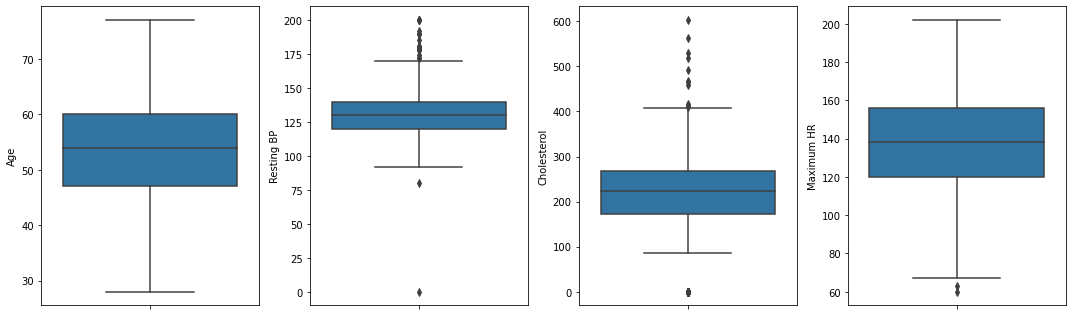

In [22]:
# checking boxplots of few variables

col = ["Age","Resting BP","Cholesterol","Maximum HR"]

plt.figure(figsize=(15,4.5))
for i in range(len(col)):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=df[col[i]])
    plt.tight_layout()

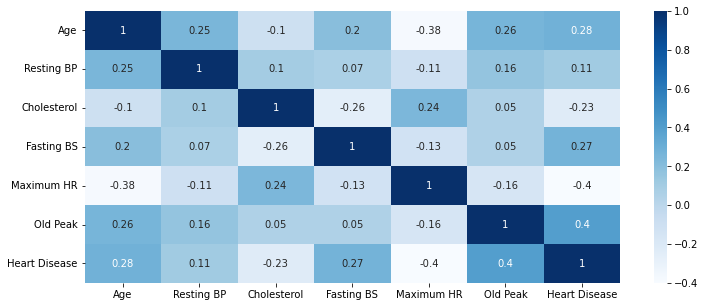

In [26]:
# checking the correlation between the variables

correlation = np.round(df.corr(),2)

plt.figure(figsize=(12,5))
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.show()

----------

### Prediction Model using Random Forest.

In [27]:
# performing encoding for some variables

for i in df.columns:
    if df[i].dtype == "object":
        df[i] = pd.Categorical(df[i]).codes

In [32]:
# no more objects

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            918 non-null    int64  
 1   Gender         918 non-null    int8   
 2   Chest Pain     918 non-null    int8   
 3   Resting BP     918 non-null    int64  
 4   Cholesterol    918 non-null    int64  
 5   Fasting BS     918 non-null    int64  
 6   Resting ECG    918 non-null    int8   
 7   Maximum HR     918 non-null    int64  
 8   EXA            918 non-null    int8   
 9   Old Peak       918 non-null    float64
 10  ST Slope       918 non-null    int8   
 11  Heart Disease  918 non-null    int64  
dtypes: float64(1), int64(6), int8(5)
memory usage: 54.8 KB


In [33]:
# dependent and independent variables

X = df.drop("Heart Disease", axis=1)
Y = df.pop("Heart Disease")

In [36]:
# train and test data splitting

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

---------

### Primary Objectives.

- To increase the accuracy of predicting patients who might have heart disease.
- To increase the recall/sensitivity by reducing the type-2 error.

### Parameters Set 1

In [39]:
# random forest model with grid search
# we have got 11 features

RFCG = RandomForestClassifier(random_state=0)

parameters = {"max_depth":[7,8,9],
              "min_samples_leaf":[50,75,100],
              "min_samples_split":[150,225,300],
              "n_estimators":[100,150,200],
              "max_features":[5,6,7]}

In [40]:
# grid search for the best parameters
# lets take cross validation value as 5

GRID = GridSearchCV(estimator=RFCG, param_grid=parameters, cv=5)
GRID.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 8, 9], 'max_features': [5, 6, 7],
                         'min_samples_leaf': [50, 75, 100],
                         'min_samples_split': [150, 225, 300],
                         'n_estimators': [100, 150, 200]})

In [41]:
GRID.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 200}

In [64]:
# selecting the best estimator as our main model
# features with higher importance in the model

model = GRID.best_estimator_

imp = np.round(model.feature_importances_*100,2)
Importance = pd.DataFrame(imp, columns=["% Importance"], index=df.columns)
Importance.sort_values("% Importance", ascending=False)

,% Importance
ST Slope,52.99
Chest Pain,20.34
Old Peak,9.98
EXA,9.79
Maximum HR,4.21
Age,1.30
Cholesterol,0.54
Resting BP,0.43
Fasting BS,0.26
Gender,0.17


In [50]:
# predictions on training data

train_prediction = model.predict(x_train)
train_prediction_prob = model.predict_proba(x_train)
y_train_prediction_prob = train_prediction_prob[:,1]

train_auc = roc_auc_score(y_train, y_train_prediction_prob)
print(round(train_auc,2))

0.92


In [47]:
# confusion matrix for training set

train_cm = confusion_matrix(y_train, train_prediction)
train_cm

array([[233,  64],
       [ 30, 315]], dtype=int64)

In [49]:
# classification report for training set

train_cr = classification_report(y_train, train_prediction)
print(train_cr)

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       297
           1       0.83      0.91      0.87       345

    accuracy                           0.85       642
   macro avg       0.86      0.85      0.85       642
weighted avg       0.86      0.85      0.85       642



In [51]:
# predictions on testing data

test_prediction = model.predict(x_test)
test_prediction_prob = model.predict_proba(x_test)
y_test_prediction_prob = test_prediction_prob[:,1]

test_auc = roc_auc_score(y_test, y_test_prediction_prob)
print(round(test_auc,2))

0.88


In [52]:
# confusion matrix for testing set

test_cm = confusion_matrix(y_test, test_prediction)
test_cm

array([[ 82,  31],
       [ 27, 136]], dtype=int64)

In [53]:
# classification report for training set

test_cr = classification_report(y_test, test_prediction)
print(test_cr)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       113
           1       0.81      0.83      0.82       163

    accuracy                           0.79       276
   macro avg       0.78      0.78      0.78       276
weighted avg       0.79      0.79      0.79       276



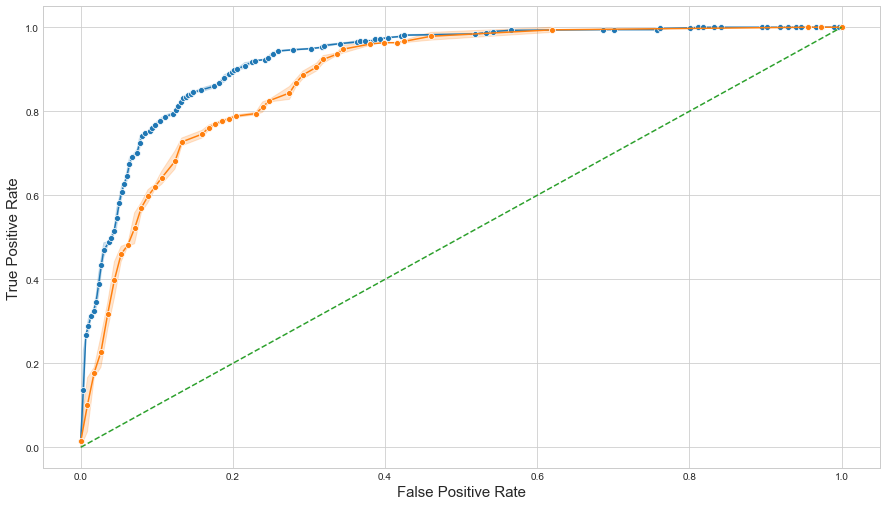

In [57]:
# roc curve for both training and testing data predictions

train_fpr, train_tpr, train_t = roc_curve(y_train, y_train_prediction_prob)
test_fpr, test_tpr, test_t = roc_curve(y_test, y_test_prediction_prob)

with plt.style.context("seaborn-whitegrid"):
    plt.figure(figsize=(15,8.5))
    sns.lineplot(train_fpr, train_tpr, marker="o")
    sns.lineplot(test_fpr, test_tpr, marker="o")
    sns.lineplot([0,1], [0,1], linestyle="--")    
    plt.xlabel("False Positive Rate", fontsize=15)
    plt.ylabel("True Positive Rate", fontsize=15)
    plt.show()

------